In [1]:
import timeit
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
import time
%matplotlib inline

### Упражнение 1

На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.  
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. 
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

### А нельзя проще это задание сделать и посчитать среднее время timeit по матрицам и гистограмму нарисовать?

Среднее время расчёта с numpy: 0.0002485429999999997, 
среднее время расчёта с list: 0.1314767734


<BarContainer object of 2 artists>

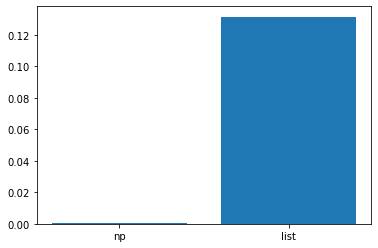

In [2]:
setup_code_np = '''
import numpy as np

def function_z_np(n=100):
    x = 100*np.random.random((n,n))
    y = 100*np.random.random((n,n))
    z = 2*np.linalg.matrix_power(x, 2) + 4*y
    return z
'''
stmt_code_np = '''
function_z_np()
'''

setup_code_list = '''
import random

def function_z_list(n=100):
    x = [[random.random()*100 for i in range(n)] for j in range(n)]
    y = [[random.random()*100 for i in range(n)] for j in range(n)]
    sq_x = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            e = 0
            for r in range(n):
                e += x[i][r]*x[r][j]
            sq_x[i][j] = e
    sq_x2 = [[2*el for el in sq_x[i][:]]for i in range(n)]
    y4 = [[4*el for el in y[i][:]]for i in range(n)]
    z = [[x + y for x, y in zip(sq_x2[i][:], y4[i][:])] for i in range(n)]
    return z
'''

stmt_code_list = '''
function_z_list()
'''


number = 500
time_np = (timeit.timeit(setup = setup_code_np, stmt = stmt_code_np, number=number))/number
time_list = (timeit.timeit(setup = setup_code_list, stmt = stmt_code_list, number=number))/number
print('Среднее время расчёта с numpy: {}, \nсреднее время расчёта с list: {}'.format(time_np, time_list))
fig, ax = plt.subplots() 
ax.bar(['np', 'list'], [time_np, time_list] )  

### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.



In [3]:
a = np.arange(2, 76, step=1)
print(a[1::2])
a[1::2] = -1
a

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]


array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])

### Упражнение 3

* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

In [4]:
a = np.arange(2, 25, step=1)
print('Массив а ', a)
b = np.arange(15, 35, step=1)
print('Массив b ', b)
print('Итог ',np.setdiff1d(a, b))

Массив а  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Массив b  [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34]
Итог  [ 2  3  4  5  6  7  8  9 10 11 12 13 14]


### Упражнение 4

* Создайте случайную квадратную матрицу случайного размера от 10 до 100. 
* Найдите максимум и сумму элементов.
* Поделите каждый элемент матрицы на максимум.
* Отнимите от каждой строки матрицы среднее по строке.
* Замените максимальное значение на -1.

In [5]:
n = np.random.randint(90)+10
a = np.random.randint(10, 80, size=(n, n))
print(a, '\n\n', 'Размерность массива: {}, максимальное значение: {}, сумма элеиентов: {}\n'.format(a.shape, a.max(), a.sum()))
a = a[:]/a.max()
print(a)
a = a[::1][:]-a[::1][:].mean(axis = 1)
print(a, a.max())
a[a==a.max()] = -1
a

[[42 63 52 ... 64 77 56]
 [54 37 38 ... 35 71 30]
 [50 13 14 ... 69 70 46]
 ...
 [56 44 50 ... 78 21 50]
 [76 19 67 ... 74 34 27]
 [56 47 72 ... 52 39 26]] 

 Размерность массива: (45, 45), максимальное значение: 79, сумма элеиентов: 89407

[[0.53164557 0.79746835 0.65822785 ... 0.81012658 0.97468354 0.70886076]
 [0.6835443  0.46835443 0.48101266 ... 0.44303797 0.89873418 0.37974684]
 [0.63291139 0.16455696 0.17721519 ... 0.87341772 0.88607595 0.58227848]
 ...
 [0.70886076 0.55696203 0.63291139 ... 0.98734177 0.26582278 0.63291139]
 [0.96202532 0.24050633 0.84810127 ... 0.93670886 0.43037975 0.34177215]
 [0.70886076 0.59493671 0.91139241 ... 0.65822785 0.49367089 0.32911392]]
[[-0.10182841  0.24247539  0.13755274 ...  0.22025316  0.40225035
   0.11364276]
 [ 0.05007032 -0.08663854 -0.03966245 ... -0.14683544  0.32630098
  -0.21547117]
 [-0.00056259 -0.39043601 -0.34345992 ...  0.2835443   0.31364276
  -0.01293952]
 ...
 [ 0.07538678  0.00196906  0.11223629 ...  0.39746835 -0.30661041
 

array([[-0.10182841,  0.24247539,  0.13755274, ...,  0.22025316,
         0.40225035,  0.11364276],
       [ 0.05007032, -0.08663854, -0.03966245, ..., -0.14683544,
         0.32630098, -0.21547117],
       [-0.00056259, -0.39043601, -0.34345992, ...,  0.2835443 ,
         0.31364276, -0.01293952],
       ...,
       [ 0.07538678,  0.00196906,  0.11223629, ...,  0.39746835,
        -0.30661041,  0.03769339],
       [ 0.32855134, -0.31448664,  0.32742616, ...,  0.34683544,
        -0.14205345, -0.25344585],
       [ 0.07538678,  0.03994374,  0.3907173 , ...,  0.06835443,
        -0.07876231, -0.26610408]])

### Упражнение 5
* Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [6]:
def fill_array(ar):
    if np.isnan(ar).all():
        ar[:] = 0
    else:
        mask = np.isnan(ar)
        mask2 = (mask==False)
        m_val = ar[mask2].mean()
        ar[mask] = m_val
    return ar, m_val

size = (5, 3, 4)
a = 10*np.random.random(size)
print('\nИсходный массив:\n\n',a)
a[np.random.choice([True, False], size = size)] = np.nan
print('\nМассив с nan:\n\n',a)
a, mean_value = fill_array(a)
print('\nОбработанный массив со средним {}:\n\n{}'.format(round(mean_value,2), a))


Исходный массив:

 [[[3.64439194 9.23814471 0.6812588  0.84960556]
  [9.38439746 4.14618934 9.82506078 8.99236107]
  [3.02591955 7.37935404 5.11193506 9.73665351]]

 [[4.79403166 2.88619418 7.13564629 8.6234506 ]
  [8.88482745 7.12495954 9.6629866  0.40815951]
  [6.02751733 6.21144291 5.79730054 5.2583089 ]]

 [[8.64616849 5.45194289 4.03152462 8.90851389]
  [4.77118515 8.78362148 2.10555496 4.38189655]
  [8.41599815 6.64103623 4.57912779 1.56967364]]

 [[4.0101684  5.31404081 8.4770317  0.76180487]
  [5.89481895 3.38418949 7.01490241 4.68153692]
  [7.15934346 6.43706125 2.50775265 3.53918469]]

 [[4.38923796 8.58837989 3.42785691 2.36114293]
  [3.96081335 5.16216156 5.691996   8.03911298]
  [7.82874851 1.34554094 8.68732605 1.16144176]]]

Массив с nan:

 [[[       nan        nan 0.6812588  0.84960556]
  [       nan        nan        nan        nan]
  [       nan 7.37935404 5.11193506 9.73665351]]

 [[       nan 2.88619418        nan        nan]
  [       nan 7.12495954        nan 0.4

### Упражнение 6
* Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [7]:
def norm_arr(ar):
    ar = ar/ar.max()
    return ar

size = (4, 7, 2)
a = 10*np.random.random(size)
print(a, '\n\n','*'*26,'\n')
a = norm_arr(a)
print(a)

[[[2.19976425 8.78552979]
  [8.42438038 5.86769038]
  [4.18733996 3.96244171]
  [7.62266909 1.22167387]
  [1.24035906 4.59937281]
  [0.64592754 8.44757398]
  [9.67120666 8.42808517]]

 [[0.86843743 8.22973592]
  [3.89945617 4.00594528]
  [0.7730232  3.51356133]
  [2.75414446 5.36895974]
  [7.4771645  2.80526597]
  [6.90104067 8.11905229]
  [1.96276515 2.2025377 ]]

 [[6.74143048 3.2154259 ]
  [3.4329981  4.73441254]
  [4.22474906 0.22129351]
  [8.26205123 3.40477958]
  [9.9374333  5.63922775]
  [0.09557398 6.7312254 ]
  [4.2283256  7.53926205]]

 [[4.82414968 4.01769003]
  [5.20307553 5.23587371]
  [1.50803779 3.06635741]
  [3.82751832 7.59521218]
  [2.11528732 3.32388938]
  [7.53365387 0.4231205 ]
  [0.89715122 5.27875624]]] 

 ************************** 

[[[0.22136141 0.8840844 ]
  [0.84774208 0.59046337]
  [0.42137037 0.39873895]
  [0.76706619 0.12293656]
  [0.12481684 0.46283307]
  [0.06499943 0.85007604]
  [0.97320972 0.84811489]]

 [[0.08739052 0.82815509]
  [0.39240074 0.403116

### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [8]:
size = (4, 1, 2)
a = 10*np.random.random(size)
np.save(r'numpy_array.npy', a)
b = np.load(r'numpy_array.npy')
print(a, '\n\nЗагруженный\n\n', b)

[[[8.57021948 4.80843662]]

 [[4.43605226 3.40487935]]

 [[0.07574639 3.98331626]]

 [[2.15998045 3.27071273]]] 

Загруженный

 [[[8.57021948 4.80843662]]

 [[4.43605226 3.40487935]]

 [[0.07574639 3.98331626]]

 [[2.15998045 3.27071273]]]


### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [9]:
# Находим ближайшее по значению

size = (4, 2, 2)
a = 10*np.random.random(size)

# Случайным образом задаём элемент
b = (np.random.randint(0,size[0]), 
     np.random.randint(0,size[1]), 
     np.random.randint(0,size[2]))

#Или np.argwhere(), если число значением задаётся

# Берём его индекс
c = a[b[0]][b[1]][b[2]]

print('Заданное число: ',c,'\n')

# Расплющиваем массив, сортируем
d = np.sort(a.flatten(), kind='quicksort')
print('Исходный массив:\n\n', a,'\n\nРасплющенный массив:\n\n', d)

# Дальше ищем ближайшее по значению
g =list(d).index(c)
e=0
f=0
neib_dig = np.nan

if g+1<=len(list(d)):
    e = abs(c - d[g+1])
if g-1>=0:
    f = abs(d[g-1]-c )
    
if e != 0 and f != 0:
    if e<=f:
        neib_dig =d[g+1]
    else:
        neib_dig =d[g-1]
elif e == 0 and f != 0:
    neib_dig =d[g-1]
elif e != 0 and f == 0:
    neib_dig =d[g+1]
else:
    neib_dig = c
print('\nБлижайшее число: ', neib_dig)



Заданное число:  5.724295290502736 

Исходный массив:

 [[[4.06627809 0.90770935]
  [8.13779831 7.70934377]]

 [[4.86111117 9.09498781]
  [0.11431424 4.94036732]]

 [[4.35145222 6.89080327]
  [4.4557573  6.9807222 ]]

 [[5.44442298 1.98192266]
  [8.67005734 5.72429529]]] 

Расплющенный массив:

 [0.11431424 0.90770935 1.98192266 4.06627809 4.35145222 4.4557573
 4.86111117 4.94036732 5.44442298 5.72429529 6.89080327 6.9807222
 7.70934377 8.13779831 8.67005734 9.09498781]

Ближайшее число:  5.444422978579912


### Упражнение 9

* Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [10]:
def matrix_n_m(n, m, k, l):
    a = np.full((n,m),k)
    a[0, ] = l
    a[:, -1] = l
    a[-1, ] = l
    a[:, 0] = l
    return a
    
r = np.random.randint(4, 15, 2)
t = np.random.randint(4, 90, 2)
a = matrix_n_m(r[0], r[1], t[0], t[1])
print(a)

[[22 22 22 22 22 22 22 22 22 22 22 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 57 57 57 57 57 57 57 57 57 57 22]
 [22 22 22 22 22 22 22 22 22 22 22 22]]


### Упражнение 10
* Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [11]:
def column_sort(n_c, ar):
    ind = (-ar[:, n_c]).argsort(kind = 'quicksort')
    print('\nНомер столбца, по которому сотируем: ',n_c, '\nИндексы строк в порядке убывания значений элементов по столбцу: ', ind)
    ar = ar[ind, :]
    return ar

n = np.random.randint(15, size = 2)+5
a = np.random.randint(10, 80, size=(n[0], n[1]))
print('Исходный массив: \n\n', a)

b = column_sort(np.random.randint(n[1]), a)
print('\nПолучившаяся матрица: \n\n', b)



Исходный массив: 

 [[78 54 47 67 35 21]
 [69 31 75 47 18 31]
 [38 57 73 77 79 28]
 [19 43 41 27 33 61]
 [28 21 32 29 39 42]
 [28 44 52 60 14 19]
 [17 21 74 74 31 56]
 [54 18 69 24 16 58]
 [54 73 14 40 36 33]
 [33 69 62 16 22 77]
 [66 74 73 44 14 22]
 [16 31 35 54 27 36]]

Номер столбца, по которому сотируем:  0 
Индексы строк в порядке убывания значений элементов по столбцу:  [ 0  1 10  7  8  2  9  4  5  3  6 11]

Получившаяся матрица: 

 [[78 54 47 67 35 21]
 [69 31 75 47 18 31]
 [66 74 73 44 14 22]
 [54 18 69 24 16 58]
 [54 73 14 40 36 33]
 [38 57 73 77 79 28]
 [33 69 62 16 22 77]
 [28 21 32 29 39 42]
 [28 44 52 60 14 19]
 [19 43 41 27 33 61]
 [17 21 74 74 31 56]
 [16 31 35 54 27 36]]


### Упражнение 11

* Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [12]:
n = np.random.randint(14)+2
print('Сторона шахматной доски: ', n)

def chess_board(n):
    ar = np.zeros(shape=(n, n))
    ar[::2, 1::2] = 1
    ar[1::2, ::2] = 1
    print('Шахматная доска заданного размера: \n\n', ar)
    return
ar = chess_board(n)

Сторона шахматной доски:  10
Шахматная доска заданного размера: 

 [[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]


### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.



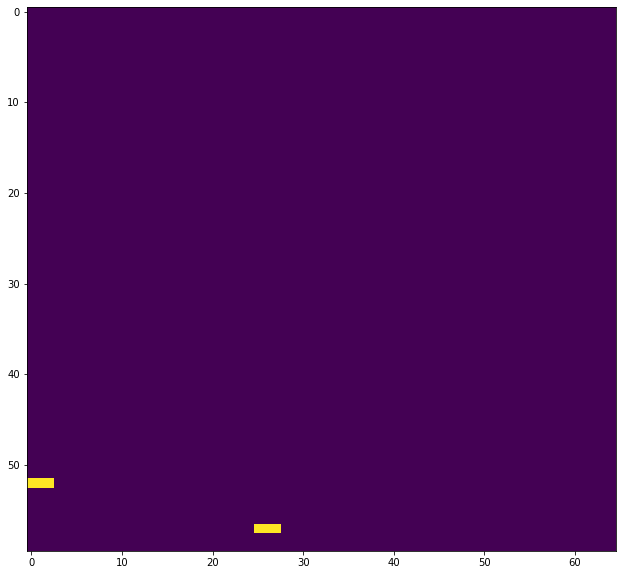

In [13]:

def Conway_s_game_of_life(m, n, cicles):
    
    ar = np.zeros((m, n))
        
    starting_position_r = np.random.randint(0, m, round(m*n*0.35))
    starting_position_c = np.random.randint(0, n, len(starting_position_r))
    ar[starting_position_r, starting_position_c] = 1    
    
    for i in range(cicles):

        ar_l = np.hstack([ar[:, 1:],np.zeros(shape = (m,1))])
        ar_r = np.hstack([np.zeros(shape = (m,1)), ar[:, :-1]])
        ar_u = np.vstack([ar[1:, :],np.zeros(shape = (1,n))])
        ar_d = np.vstack([np.zeros(shape = (1,n)), ar[:-1, :]])
        
        ar_l_u = np.vstack([ar_l[1:, :],np.zeros(shape = (1,n))])
        ar_l_d = np.vstack([np.zeros(shape = (1,n)), ar_l[:-1, :]])
        
        
        ar_r_u = np.vstack([ar_r[1:, :],np.zeros(shape = (1,n))])
        ar_r_d = np.vstack([np.zeros(shape = (1,n)), ar_r[:-1, :]])
        
        ar_neighbour = ar_l + ar_l_u + ar_l_d + ar_r + ar_r_u + ar_r_d + ar_u + ar_d
        
        ar_check = ar*ar_neighbour
        ar_check2 = (ar-1)*ar_neighbour
        
        ar = np.zeros(shape=(m, n))
        i, j = np.where(ar_check == (2 or 3))
        ar[i,j] = 1
        i, j = np.where(ar_check2 == (-3))
        ar[i,j] = 1
        
        
        fig = plt.figure(figsize=(20, 10))
        plt.imshow(ar)
        plt.show()
        display.clear_output(wait=True)
        time.sleep(0.05)
    return
        


m, n, cicles = input('Введит размерность сетки MxN и число циклов: ').split()
m, n, cicles = int(m), int(n), int(cicles)
Conway_s_game_of_life(m, n, cicles)
    
    